In [1]:
import numpy as np

In [2]:
def sign(val: float) -> int:
    if np.any(val > 0):
        return 1
    else:
        return -1
    
def initialize_weights(d: int) -> tuple:
    # This initializes a d-dimensional tuple with 0 in all the dimensions
    return tuple([0 for _ in range(d)])

def perceptron(x: tuple, w: tuple) -> int:
    
    totaal = 0
    x = np.array(x)
    w = np.array(w)
    h = w*x
    
    for n in h:
        totaal = totaal + n
    h = sign(totaal)
    return h

def update_weights(x_t: tuple, y_t: int, w_t: tuple) -> tuple:
    
    w0 = w_t[0]+y_t*x_t[0]
    w1 = w_t[1]+y_t*x_t[1]
    w2 = w_t[2]+y_t*x_t[2]
    w_t_plus_1 = [w0,w1,w2]
    return w_t_plus_1


def learn_weights(xn: list, yn: list) -> tuple:

    w = initialize_weights(3)
    t = 0
    count = len(xn)
    while count !=0 :
        count = len(xn)
        for n in range(len(xn)):
                outp = perceptron(xn[n],w)
                if outp == yn[n]:
                    count -= 1
                    continue
                else:
                    w = update_weights(xn[n], yn[n], w)

        t += 1
    print(f'Converged in {t} iterations')
    return w

In [3]:
import random

SLOPE, INTERCEPT = random.uniform(-10, 10), random.uniform(-10, 10)

MAX_VAL = 100

def get_random_point():
    x1 = random.uniform(-MAX_VAL, MAX_VAL)
    x2 = random.uniform(-MAX_VAL, MAX_VAL)
    return (1, x1, x2)

def target(x):

    if x[2] > SLOPE * x[1] + INTERCEPT:
        return 1
    else:
        return -1
    
def generate_data(n: int) -> tuple:


    i = 0
    xn = []
    yn = []
    while i<n:
        p = get_random_point()
        xn.append(p)
        i += 1
    for coordinate in xn:
        t = target(coordinate)
        yn.append(t)
    return xn, yn



Generate the desired amount of datapoints.

In [4]:
x20, y20 = generate_data(20)

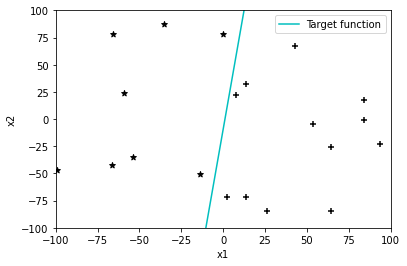

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def get_plot_markers(yn: list) -> list:

    plot_marker=[]
    for uitkomst in yn:
        if uitkomst == 1:
            marker = "*"
            plot_marker.append(marker)
        if uitkomst == -1:
            marker = "+"
            plot_marker.append(marker)
    return plot_marker

def plot(xn, yn):
    # The x axis should be the x1 axis of the data
    # The y axis should be the x2 axis of the data
    # The marker should be different for +1 and -1 samples

    plot_x = [x[1] for x in xn]
    plot_y = [x[2] for x in xn]
    plot_marker = get_plot_markers(yn)

    # Plot the markers of the datapoints
    fig, ax = plt.subplots()
    for xp, yp, m in zip(plot_x, plot_y, plot_marker):
        ax.scatter([xp],[yp], marker=m, color='k')

    # Add the random line used to generate the target function (HINT: use SLOPE and INTERCEPT)
    x = np.linspace(-100,100,100)
    yr = SLOPE*x+INTERCEPT
    plt.plot(x,yr,'c', label='Target function')


    # Add axis labels and a legend
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.legend()
    plt.xlim(-MAX_VAL, MAX_VAL)
    plt.ylim(-MAX_VAL, MAX_VAL)
    plt.show()

plot(x20, y20)

Learn the weights for your hypothesis.

In [6]:
w = learn_weights(x20,y20)

Converged in 2 iterations


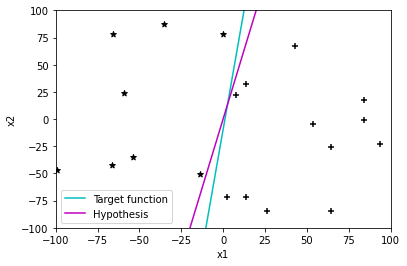

In [7]:
def plot(xn, yn, w):
    # The x axis should be the x1 axis of the data
    # The y axis should be the x2 axis of the data
    # The marker should be different for +1 and -1 samples

    plot_x = [x[1] for x in xn]
    plot_y = [x[2] for x in xn]
    plot_marker = get_plot_markers(yn)

    # Plot the markers of the datapoints
    fig, ax = plt.subplots()
    for xp, yp, m in zip(plot_x, plot_y, plot_marker):
        ax.scatter([xp],[yp], marker=m, color='k')

    # Add the random line used to generate the target function
    x = np.linspace(-100,100,100)
    yr = SLOPE*x+INTERCEPT
    plt.plot(x,yr,'c', label='Target function')

    # Add the learned hypothesis
    # To plot the hypothesis, we need to convert the weights w0, w1, w2 into a line
    y = (-w[1]/w[2])*x+(-w[0]/w[2])
    plt.plot(x,y,'m',label='Hypothesis')

    # Add axis labels and a legend
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.legend()
    plt.xlim(-MAX_VAL, MAX_VAL)
    plt.ylim(-MAX_VAL, MAX_VAL)
    plt.show()


#CHANGE xn and yn to the  amount of generated datapoints!

plot(x20, y20, w)